# Task - 1

## Prediction using Supervised Machine Learning

## #GRIPNOVEMBER22

### Name: MOHAMMAD ADNAN
### Email: mohammadadnan7549@gmail.com

In [2]:
# Importing all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Reading csv file directly through url.

url="http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Lets analyse the relationship between Hours and Scores graphically.

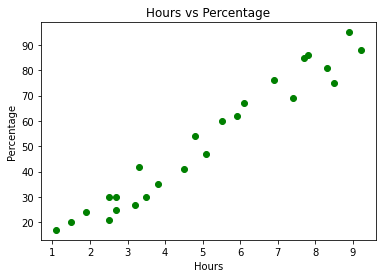

In [23]:
plt.scatter(df['Hours'],df['Scores'],color='green')
plt.title("Hours vs Percentage")
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

From the graph above, we can clearly see that there is a linear regression between Hours studied by the student and the Percentage of score.

## Data Preparation

Now, divide the data in two parts: input(Hours) and output(Percentage)

In [48]:
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values

In [51]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [52]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now, we have our input and output labels.
The next step we will split the dataset into training and testing datasets.And for this we will use Scikit-Learn's built-in train_test_split() method:

## Splitting the data into Test and Train

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [56]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [57]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [58]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [59]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

## Training our Linear Regression Algorithm

We have now split our data into train and test, it's time to train our model.

In [60]:
from sklearn.linear_model import LinearRegression
linReg_model = LinearRegression()
linReg_model.fit(X_train,y_train)

LinearRegression()

In [61]:
# Equation of the regression line

a = linReg_model.coef_
c = linReg_model.intercept_
b = a*X + c

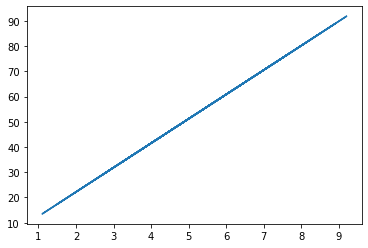

In [62]:
#plotting the regression line
plt.plot(X,b)
plt.show()

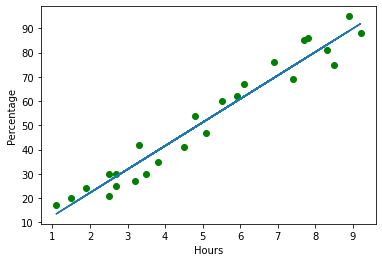

In [70]:
# scatter plot and regression line of the data

plt.scatter(X,y,c='green')
plt.plot(X,b)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

## Making prediction

Now we have trained our regression model. Let's predict for some inputs and check our model accuracy.

In [87]:
y_prediction = linReg_model.predict(X_test)

In [93]:
y_prediction

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [94]:
# Comparing the Actual and Predicted score percentage.

df2 = pd.DataFrame({'Actual':y_test, 'Predicted': y_prediction})

In [95]:
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Question: What will be the predicted score if the student studies for 9.25hrs/day?

In [109]:
hours = 9.25
our_pred = linReg_model.predict([[hours]])

In [113]:
our_pred = our_pred[0]

In [114]:
print('No. of hours: {}'.format(hours))
print('No. of predicted score: {}'.format(our_pred))

No. of hours: 9.25
No. of predicted score: 92.38611528261494


## Model Evaluations:

It is our final step, in which by using some metrices we will evaluate our model performance. Hence it is very important step.

In [119]:
from sklearn import metrics

print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
print('Mean Square Error: {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
print('R-Squared score: {}'.format(metrics.r2_score(y_test,y_prediction)))




Mean Absolute Error: 3.9207511902099244
Mean Square Error: 18.943211722315272
R-Squared score: 0.9678055545167994


As evaluated, the Mean Absolute Error and Mean Square Error are very less. Hence performance of the model is very good and accurate.
Also R-Squared score is very much closer to 1, which means that the regression was able to capture ~97% of the variance in the target variable. 